In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional

import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn.model_selection

import seaborn as sns
from sklearn.decomposition import PCA

In [26]:
CSV_FILE = 'datos_clasificacion.csv'

df = pd.read_csv(CSV_FILE)
display(df.head())

,edad,educacion_madre,educacion_padre,tiempo_viaje,tiempo_estudio,relacion_familiar,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,...,independizado_padres_True,ocupacion_madre_True,ocupacion_padre_True,razon_matricula_True,interes_educacion_superior_True,internet_casa_True,apoyo_escolar_True,apoyo_familiar_True,actividades_True,relacion_romantica_True
0,15.0,4.0,3.0,1.0,3.0,5.0,4.0,3.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,0
1,18.0,2.0,2.0,2.0,3.0,4.0,2.0,1.0,1.0,1.0,...,1,1,1,1,1,1,0,0,0,1
2,17.0,3.0,2.0,1.0,1.0,5.0,5.0,5.0,2.0,4.0,...,1,1,1,1,1,1,0,1,1,0
3,18.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,19.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,1.0,1.0,...,1,1,1,1,1,1,0,1,1,1


El dataset contiene 32 columnas y 587 registros, con variables numéricas continuas y binarias (convertidas a valores 1 o 0). Algunas características clave del dataset:

Variables continuas: como edad, educacion_madre, tiempo_viaje, etc., que podrían influir en la formación de clusters.
Variables binarias: como beca, internet_casa_True, apoyo_escolar_True, entre otras.
Posibles análisis de clusterización
Clusterización con todas las columnas:

Estandariza las columnas continuas para garantizar que las variables con diferentes escalas no dominen el análisis.
Utiliza variables binarias directamente, ya que ya están en una escala homogénea.
Análisis con un subconjunto de columnas:

Selecciona únicamente las columnas más relevantes (por ejemplo, variables continuas que representen factores importantes como notas o tiempo de estudio).
Clusterización tras reducción de dimensionalidad (como PCA):

Reduce las dimensiones del dataset a 2 o 3 componentes principales para visualizar los clusters.
Propuesta de análisis
Vamos a realizar:

Estandarización de las variables continuas.
Aplicación de PCA para reducir las dimensiones a 3.
KMeans para crear clusters.
Visualización de los clusters en 3D.

In [27]:
def plot_data_3D(
    data: np.ndarray, labels: Optional[np.ndarray] = None, title: Optional[str] = None
) -> None:
    """
    Función auxiliar para graficar datos en 3D. Se espera que `X` tenga 3 columnas.

    :param X: Datos a graficar.
    :param labels: Etiquetas de los datos, para colorearlos. Si no se proveen, los datos se grafican en un único color.
    :param title: Título del gráfico.
    """
    assert data.shape[1] == 3, "Se esperan 3 columnas en X."

    # Use Seaborn style
    plt.style.use("ggplot") # Cambiado de seaborn 
    # Ignore the Matplotlib deprecation warnings
    plt.rcParams.update({"figure.max_open_warning": 0})

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    if labels is None:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=100)
    else:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=100, cmap=cm.jet)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    if title is not None:
        ax.set_title(title)

    plt.show()

#### Método del codo kmeans

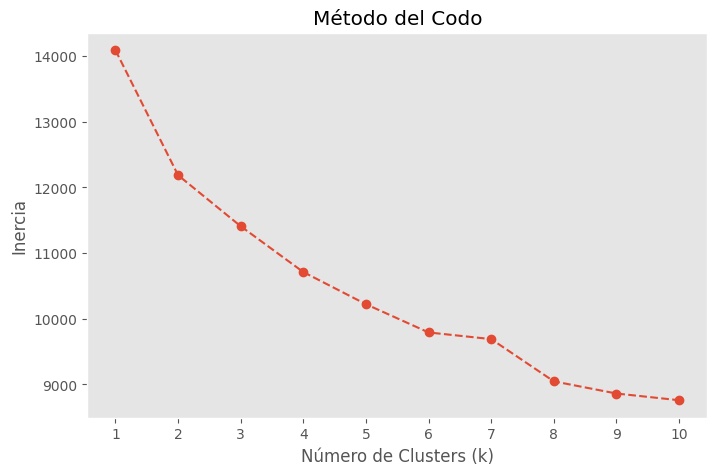

In [28]:
# Estandarizar los datos
variables_interes = df.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables_interes])



# Gráfico de codo: Encontrar el número óptimo de clusters
inercia = []
k_range = range(1, 11)  # Probar entre 1 y 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inercia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid()
plt.show()



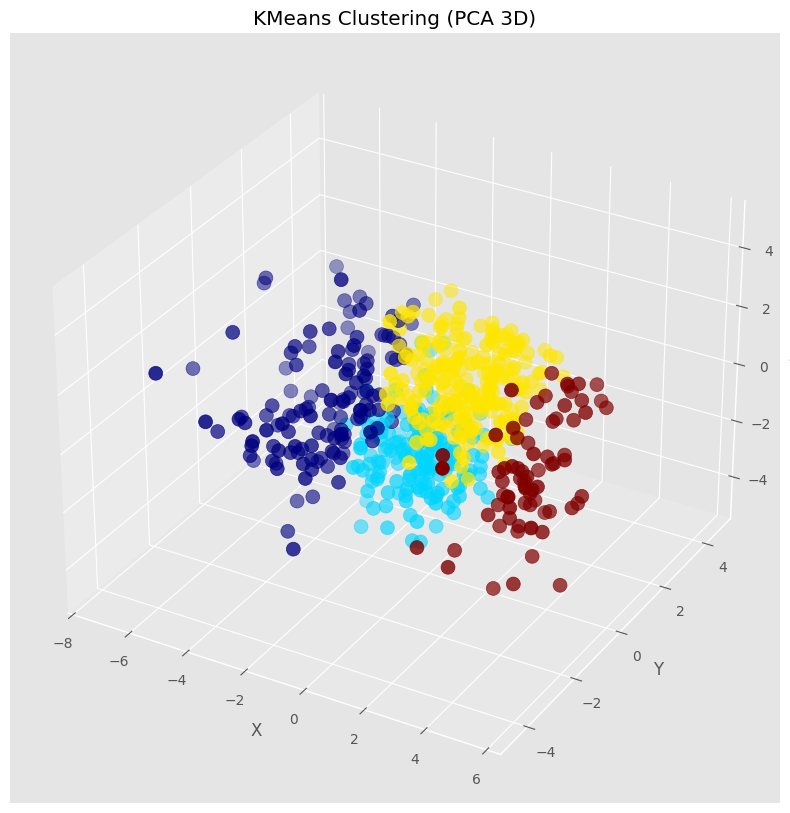

In [29]:


# Clustering en los datos originales
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Reducir a 3 dimensiones para visualización
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Calcular la varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.sum(varianza_explicada)
# Graficar los clusters en el espacio reducido
plot_data_3D(data=df_pca, labels=clusters, title="KMeans Clustering (PCA 3D)")


In [30]:
from sklearn.metrics import silhouette_score

# En 10 dimensiones
silhouette_10d = silhouette_score(df_scaled, clusters)
print("Silhouette score en 10 dimensiones:", silhouette_10d)

# En 3 dimensiones (opcional)
silhouette_3d = silhouette_score(df_pca, clusters)
print("Silhouette score en 3 dimensiones:", silhouette_3d)


Silhouette score en 10 dimensiones: 0.08669719653233168
Silhouette score en 3 dimensiones: 0.2513300630473698


In [31]:
print("Varianza explicada por cada componente principal:", varianza_explicada)
print("Varianza explicada acumulada:", varianza_acumulada)


Varianza explicada por cada componente principal: [0.21236015 0.09299325 0.09048194]
Varianza explicada acumulada: 0.39583534229301337


#### Análisis de composición de los clusters

In [32]:
# Mostrar el resumen de la composición de cada cluster
# Si el DataFrame original es 'df' y has hecho el ajuste con 'kmeans'
if 'Cluster' not in df.columns:
    df['Cluster'] = kmeans.predict(df_scaled)


cluster_summary = df.groupby('Cluster').mean()

# Cambiar los nombres de los clusters (puedes usar números o nombres personalizados)
cluster_summary.index = [f'Cluster {i}' for i in cluster_summary.index]

# Imprimir el resumen de la composición de cada cluster
print(cluster_summary)




                edad  educacion_madre  educacion_padre  tiempo_viaje  \
Cluster 0  17.119403         1.977612         1.843284      1.917910   
Cluster 1  16.119497         1.930818         1.691824      1.534591   
Cluster 2  16.468468         3.076577         2.828829      1.400901   
Cluster 3  17.152778         3.111111         2.680556      1.333333   

           tiempo_estudio  relacion_familiar  tiempo_libre  salir_amigos  \
Cluster 0        1.425373           3.843284      3.671642      3.761194   
Cluster 1        1.842767           3.786164      2.823899      2.679245   
Cluster 2        2.121622           3.891892      3.121622      3.148649   
Cluster 3        2.347222           4.125000      3.069444      3.083333   

           consumo_alcohol_entre_semana  consumo_alcohol_fin_de_semana  ...  \
Cluster 0                      2.119403                       3.156716  ...   
Cluster 1                      1.176101                       1.704403  ...   
Cluster 2            

# Análisis de Variables de Interés por Cluster

## Edad:
- **Cluster 0**: Media de 17.12
- **Cluster 1**: Media de 16.12 (menor que Cluster 0)
- **Cluster 2**: Media de 16.47
- **Cluster 3**: Media de 17.15 (similar a Cluster 0)
- **Diferencia**: El Cluster 1 tiene la edad promedio más baja, mientras que el Cluster 3 tiene la edad más alta.

## Educación de los Padres:
- **Cluster 0**: Media de 1.98 y 1.84
- **Cluster 1**: Media de 1.93 y 1.69 (educación más baja que Cluster 0)
- **Cluster 2**: Media de 3.08 y 2.83 (más alta)
- **Cluster 3**: Media de 3.11 y 2.68 (similar a Cluster 2)
- **Diferencia**: Los Clusters 2 y 3 tienen niveles de educación de padres más altos en comparación con Clusters 0 y 1.

## Tiempo de Viaje:
- **Cluster 0**: Media de 1.92
- **Cluster 1**: Media de 1.53 (menor)
- **Cluster 2**: Media de 1.40 (menor)
- **Cluster 3**: Media de 1.33 (menor)
- **Diferencia**: Cluster 0 tiene un tiempo de viaje promedio más alto que los otros, que tienden a ser similares.

## Tiempo de Estudio:
- **Cluster 0**: Media de 1.43
- **Cluster 1**: Media de 1.84 (mayor)
- **Cluster 2**: Media de 2.12 (mayor)
- **Cluster 3**: Media de 2.35 (mayor)
- **Diferencia**: Los Clusters 1, 2 y 3 tienen un tiempo de estudio más alto que Cluster 0.

## Relación Familiar:
- **Cluster 0**: Media de 3.84 (más alta)
- **Cluster 1**: Media de 3.79
- **Cluster 2**: Media de 3.89 (similar a Cluster 0)
- **Cluster 3**: Media de 4.13 (la más alta)
- **Diferencia**: Cluster 3 tiene la relación familiar más alta, seguido por Cluster 0 y Cluster 2.

## Consumo de Alcohol (Fin de Semana):
- **Cluster 0**: Media de 3.16 (más alta)
- **Cluster 1**: Media de 1.70 (la más baja)
- **Cluster 2**: Media de 2.18
- **Cluster 3**: Media de 2.01
- **Diferencia**: Cluster 0 tiene el consumo de alcohol de fin de semana más alto, mientras que Cluster 1 tiene el más bajo.

## Interés por la Educación Superior:
- **Cluster 0**: Media de 0.67
- **Cluster 1**: Media de 0.99 (más alta)
- **Cluster 2**: Media de 1.00 (máxima)
- **Cluster 3**: Media de 1.00 (máxima)
- **Diferencia**: Clusters 1, 2 y 3 muestran un mayor interés por la educación superior en comparación con Cluster 0.

## Internet en Casa:
- **Cluster 0**: Media de 0.73
- **Cluster 1**: Media de 0.64 (menor)
- **Cluster 2**: Media de 0.98 (más alta)
- **Cluster 3**: Media de 0.83
- **Diferencia**: Cluster 2 tiene la mayor proporción de personas con internet en casa, mientras que Cluster 1 tiene la menor.

## Observaciones Generales:
- **Cluster 0**: Representa un grupo con edad media más alta, consumo de alcohol de fin de semana más alto, y mejor relación familiar.
- **Cluster 1**: Tiene la edad más baja, interés moderado por la educación y el menor consumo de alcohol.
- **Clusters 2 y 3**: Comparten características similares en términos de educación de los padres, interés por la educación superior y relación familiar alta.
- **Cluster 3**: Se destaca por tener el tiempo de estudio más alto y la mejor relación familiar, mientras que Cluster 2 se distingue por su mayor acceso a internet.


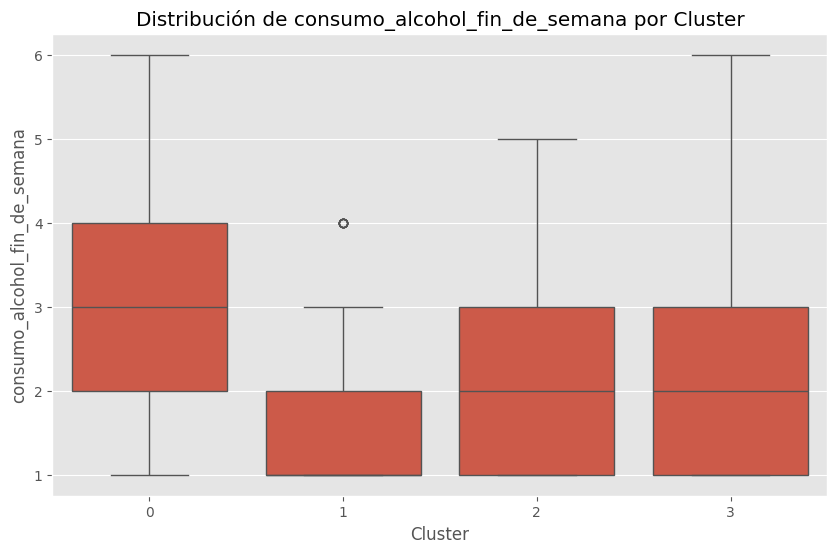

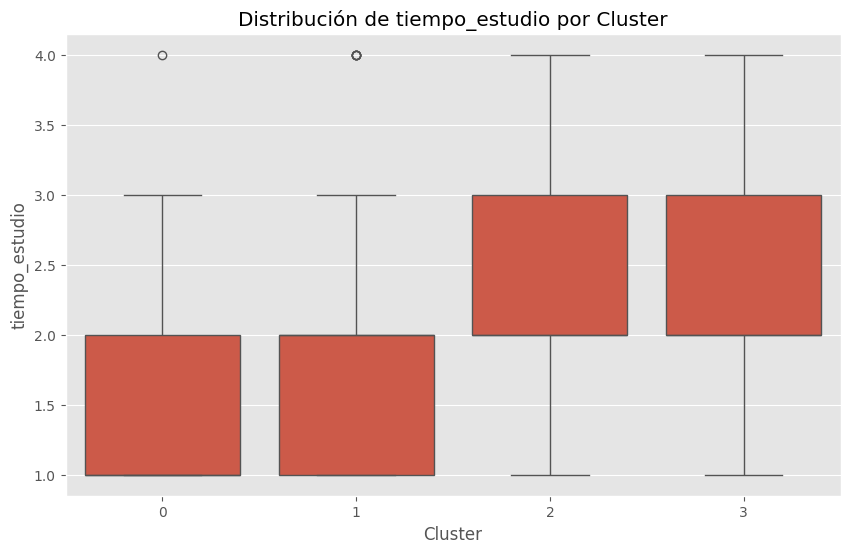

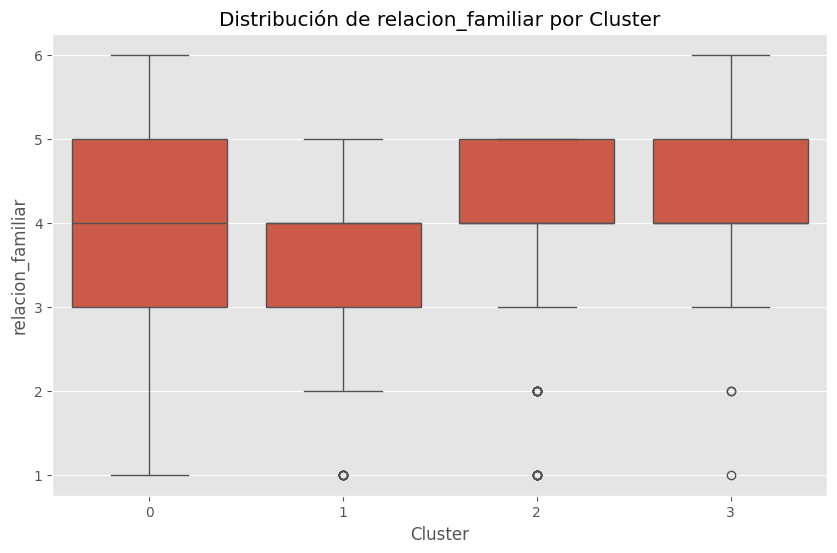

ValueError: Could not interpret value `internet_casa` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA

# Variables de interés para los boxplots
variables_interes = ['consumo_alcohol_fin_de_semana', 'tiempo_estudio', 'relacion_familiar', 'internet_casa']

# Graficar un boxplot para cada variable de interés
for variable in variables_interes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=variable, data=df)
    plt.title(f'Distribución de {variable} por Cluster')
    plt.show()





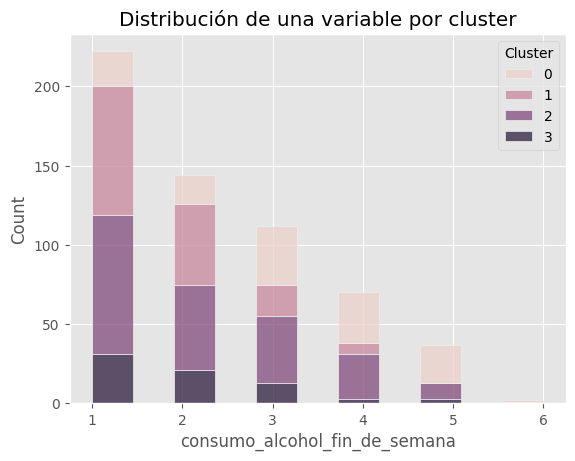

In [ ]:
# Histograma de distribución por cluster
sns.histplot(data=df, x='consumo_alcohol_fin_de_semana', hue='Cluster', multiple='stack')
plt.title('Distribución de Consumo de Alcohol por Cluster')
plt.show()

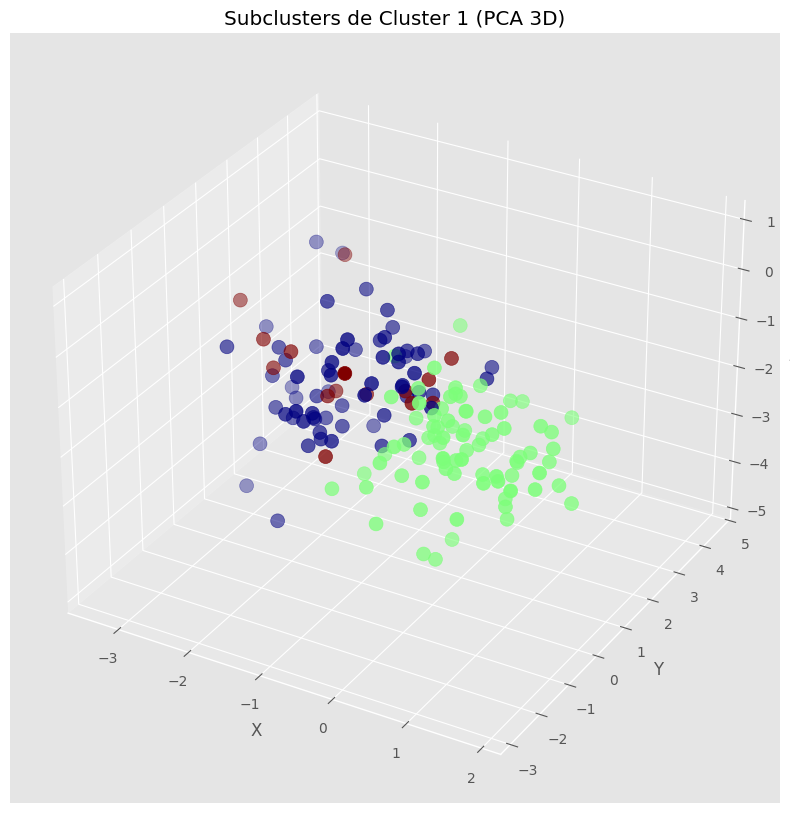

In [ ]:
# Seleccionar un cluster específico y crear una copia para evitar la advertencia
cluster_interes = df[df['Cluster'] == 2].copy()  # Cambia el número de cluster según sea necesario

# Aplicar KMeans al sub-cluster
kmeans_sub = KMeans(n_clusters=3, random_state=42)
sub_clusters = kmeans_sub.fit_predict(cluster_interes)

# Añadir los sub-clusters al DataFrame de sub-cluster
cluster_interes['SubCluster'] = sub_clusters

# PCA para reducción de dimensiones
pca = PCA(n_components=3)
df_pca = pca.fit_transform(cluster_interes[variables_interes])

# Graficar los sub-clusters (usando las 3 dimensiones de PCA)
plot_data_3D(data=df_pca, labels=sub_clusters, title="Subclusters de Cluster 2 (PCA 3D)")
